In [69]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [70]:
class MultiClassLogisticRegression:

    def __init__(self, X, y, random_seed=10):
        np.random.seed(random_seed)
        self.loss = []
        self.classes = np.unique(y)
        self.class_labels = {c: i for i, c in enumerate(self.classes)}
        self.weight = np.random.rand(len(self.classes), X.shape[1])
        self.Ti = self.one_hot_encoding(y)

    def one_hot_encoding(self, y):
        return np.eye(len(self.classes))[np.vectorize(lambda c: self.class_labels[c])(y).reshape(-1)]

    def predict(self, X, weight):
        z = np.dot(X, weight.T)
        return self.softmax(z)

    def softmax(self, z):
        z -= np.max(z, axis=1, keepdims=True)  # Numerical stability
        exp_z = np.exp(z)
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def cross_entropy_loss(self, probs, n):
        epsilon = 1e-8 # Small epsilon value to prevent numerical instability
        clipped_probs = np.clip(probs, epsilon, 1 - epsilon)  # Clip probabilities to avoid extreme values
        return -(np.sum(self.Ti * np.log(clipped_probs))) / n
        # return -(np.sum(self.Ti * np.log(probs))) / n

    def cross_entropy_loss_gradient(self, X, probs, n):
        return -(np.dot(X.T, (self.Ti - probs))).T / n

    def armijo_line_search(self, X, gradient, direction, current_loss, alpha, rho, c):

        while True:
            new_weight = self.weight + alpha * direction
            probs = self.predict(X, new_weight)
            new_loss = self.cross_entropy_loss(probs, len(X))
            armijo_condition = new_loss <= current_loss + c * alpha * np.sum(gradient * direction)
            if armijo_condition:
                break
            else:
                alpha *= rho
        return alpha

    def gradient_descend(self, X, max_epoch, threshold, alpha, rho, c):
        N = len(X)

        for i in range(max_epoch):

            probs = self.predict(X, self.weight)
            loss = self.cross_entropy_loss(probs, N)
            if loss <= threshold:
                break
            gradient = self.cross_entropy_loss_gradient(X, probs, N)
            direction = -gradient
            lr = self.armijo_line_search(X, gradient, direction, loss, alpha, rho, c)
            self.weight = self.weight + lr * direction
            self.loss.append(loss)
        

In [71]:
MAX_EPOCH = 10000
ARMIJO_RHO = 0.5
ARMIJO_ALPHA = 1
ARMIJO_C = 0.1
THRESHOLD = 0.001

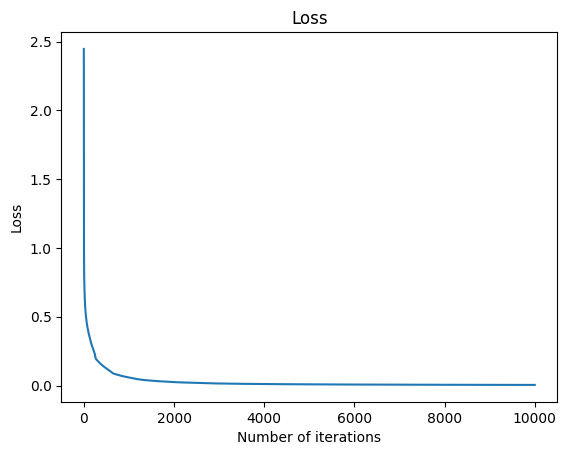

In [72]:
X, y = datasets.load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)
lr = MultiClassLogisticRegression(X_train, y_train)
lr.gradient_descend(X_train, MAX_EPOCH, THRESHOLD, ARMIJO_ALPHA, ARMIJO_RHO, ARMIJO_C)
plt.plot(np.arange(len(lr.loss)), lr.loss)
plt.title("Loss")
plt.xlabel("Number of iterations")
plt.ylabel("Loss")
plt.show()

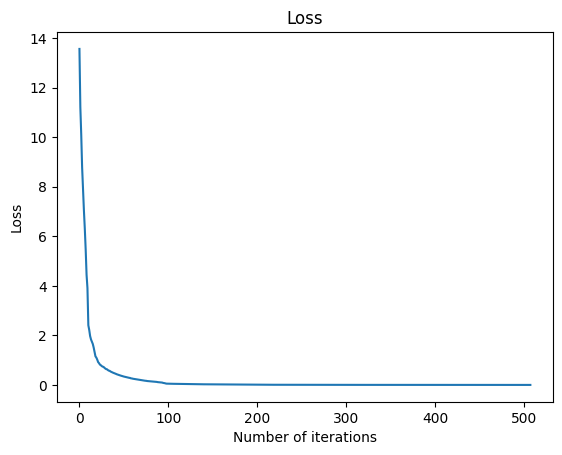

In [73]:
X, y = datasets.load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)
lr = MultiClassLogisticRegression(X_train, y_train)
lr.gradient_descend(X_train, MAX_EPOCH, THRESHOLD, ARMIJO_ALPHA, ARMIJO_RHO, ARMIJO_C)
plt.plot(np.arange(len(lr.loss)), lr.loss)
plt.title("Loss")
plt.xlabel("Number of iterations")
plt.ylabel("Loss")
plt.show()